<h1><b>Plot with Pandas: Python Data Visualization Basics</b></h1>
<p>In this notebook, I will be covering an important concept that users must know once they get acquainted with Pandas: the <code>SettingWithCopyWarning</code> issue. As a beginner, I would often disregard this sign as the outcome of the code would not necessarily change (apparently). Now, there are <b>shallow copies</b> and <b>deep copies</b>, notions that are related to the aforementioned warning. I'll discuss the difference between these concepts as well as assessing the impact of their use in data analysis.</p>
<p>By the end of this notebook, I hope to have covered the following topics:</p>
<ul>
    <li>The definition of <b>views</b> and <b>copies</b> in NumPy and Pandas</li>
    <li>How to work with views and copies in these libraries</li>
    <li>Why <code>SettingWithCopyWarning</code> happens in Pandas</li>
    <li>How to avoid getting a <code>SettingWithCopyWarning</code> in Pandas</li>
</ul>

<h2><b>Table of contents:</b></h2>
<ul>
    <li>Example of a <code>SettingWithCopyWarning</code></li>
    <li>Views and Copies in NumPy and Pandas</li>
        <ul>
            <li>Understanding views and copies in NumPy</li>
            <li>Understanding views and copies in Pandas</li>
        </ul>
    <li>Indices and Slices in NumPy and Pandas</li>
        <ul>
            <li>Indexing in NumPy: copies and views</li>
            <li>Indexing in Pandas: copies and views</li>
        </ul>
<li>Use of Views and Copies in Pandas</li>
    <ul>
        <li>Chained Indexing and <code>SettingWithCopyWarning</code></li>
        <li>Impact of Data Types on Views, Copies, and the <code>SettingWithCopyWarning</code></li>
        <li>Hierarchical Indexing and <code>SettingWithCopyWarning</code></li>
    </ul>
<li>Change the Default <code>SettingWithCopyWarning</code> Behavior</li>
<li>Conclusion</li>
</ul>

<p>Let's start by importing the required modules and checking their versions. Then, we can move on and proceed with our discussion on this notebook's topic.</p>



<h2><b>1. Setting Up your Environment</b></h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = ("https://raw.githubusercontent.com/fivethirtyeight/"
                "data/master/college-majors/recent-grads.csv")

In [3]:
df = pd.read_csv(url)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
pd.set_option("display.max.columns", None)

In [6]:
df.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,2924,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,55450,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


<h2><b>2. Create your First Pandas Plot</b></h2>

<p>The matplotlib magic command sets up your notebook for displaying plots in your output. The <i>inline</i> sets the charts to be plotted in the output of the notebook.</p>

In [7]:
%matplotlib

Using matplotlib backend: <object object at 0x00000251EF4451B0>


In [8]:
%matplotlib inline

<Axes: xlabel='Rank'>

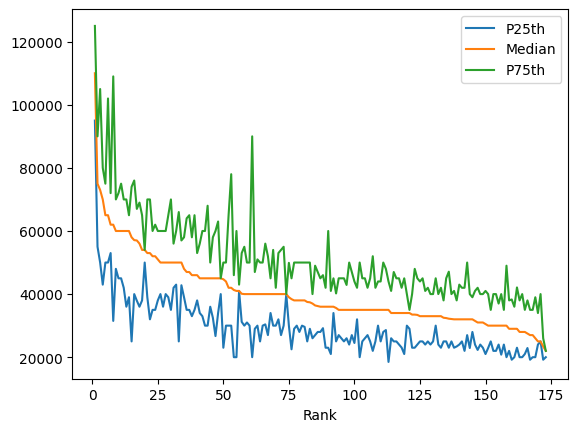

In [9]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

<p>The x-axis represent the rank of each institution, while <code>P25th</code>, <code>Median</code>, and <code>P75th</code> are represented on the y-axis.</p>
<p><b>Note</b>: to display the plot in a python shell, you must call <code>plt.show()</code> to display the plot.</p>
<p>Observations on the plot:</p>
<ul>
    <li>The median income <i>decreases</i> as the rank decreases. This is expected, as the rank is determined by the median income.</li>
    <li>Some majors have <b>large gaps</b> between the 25th and the 75h percentiles. Earnings can therefore be much higher or lower than the medium income. Other majors, in contrast, present narrow gaps between the percentiles. Salaries here are very close to the median.</li>
    <ul>
        <li>This means that some majors have a wide range of earnings, while others present a narrower range.</li>
    </ul>
</ul>
<p><code>.plot()</code> has several parameters for different chart types. Check the documentation. The default is <code>"line"</code>. If you don't provide a parameter to <code>.plot()</code>, then the <b>index</b> will be used for the <b>x-axis</b> and <b>all numeric columns</b> on the <b>y-axis</b>, which can get messy if you have too many numerical variables.<p>
<p>Also, DataFrame objects have several methods that you can use to create various charts: <code>df.plot(kind="bar")</code> or <code>df.plot.bar()</code>, for instance.</p>
<hr>
<h2><b>3. Under the Hood: Matplotlib</b></h2>
<p>When you call <code>.plot()</code> on a DataFrame object, Matplotlib creats a plot under the hood.</p>


In [10]:
# import matplotlib plot libraty
import matplotlib.pyplot as plt

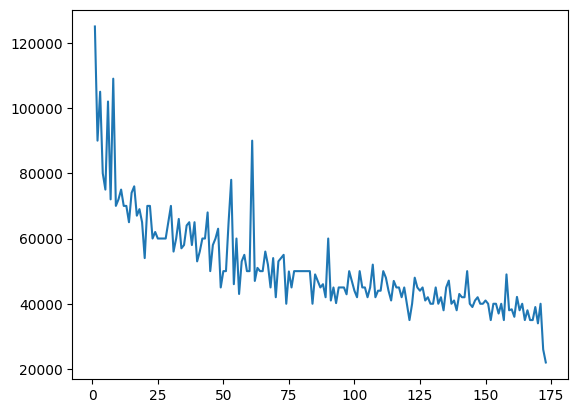

In [11]:
plt.plot(df["Rank"], df["P75th"])

<Axes: xlabel='Rank'>

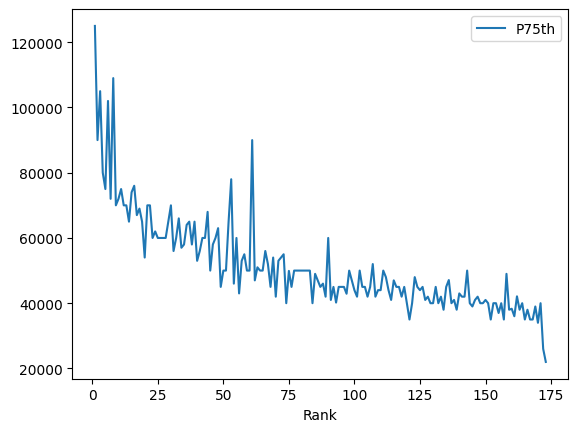

In [12]:
df.plot(x="Rank", y="P75th")

<p>As we can see, both methods create the exact same graph. <code>.plot()</code> is a wrapper for <code>plt.plot()</code>. You can use both to produce the same graph from a DataFrame. However, if you already have a DataFrame instance, <code>df.plot()</code> offers a better and cleaner syntax.</p>

```python
plt.plot(df["col_for_x"], df["col_for_y"])

df.plot(x="col_for_x", y="col_for_y")
```

<hr>
<h2><b>4. Survey your Data</b></h2>
<h3>4.1. Data Distribution | <b>Histogram</b></h3>
<p>The Series object also offers similar functionalities as to DataFrames. Here's an example using <code>"Median"</code>.

In [13]:
median_column = df["Median"]

In [14]:
type(median_column)

pandas.core.series.Series

<Axes: ylabel='Frequency'>

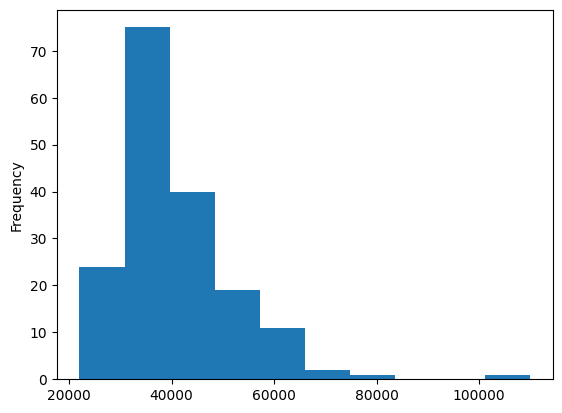

In [15]:
median_column.plot(kind="hist")

<p>We can see the result as a histogram ranging from $20,000 to $40,000, in which each bin presents a width of $10,000. It has a skewed distribution, with a long right tail. It peaks on the left below $40,000. The tail streches far to the right, hintint at fields whose majors can expect higher earnings. That brings us to <b>outliers</b>. The higher earnings suggest that some areas earn higher than the average and the runner-up. We have a single observation above $100,000. hence, we can detect outliers with histograms.</p>
<h3>4.2. Outliers | <b>Bar charts</b></h3>
<p>When we only want to compare a few data points, but we want to see more details about them, a <b>bar chart</b> is the right choice. Let's get the top 5 median salaries. We need to sort our values using <code>sort_values()</code> by the median column. We pass the parameter <code>ascending=False</code> to sort values from higher to lower. Then, we apply <code>.head()</code> to get the first 5 values.</p>

In [16]:
top_5 = df.sort_values(by="Median", ascending=False).head()

In [17]:
top_5

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


<Axes: xlabel='Major'>

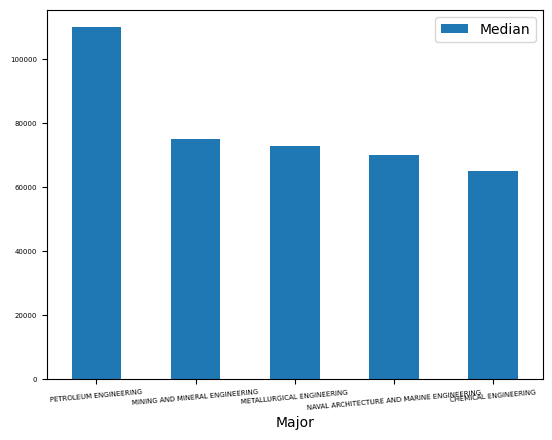

In [18]:
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=5)

<Axes: ylabel='Major'>

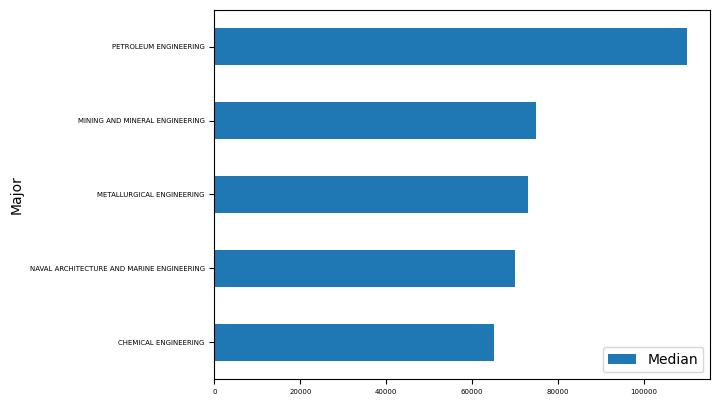

In [19]:
# Alternative - horizontal bar chart
# reverse the order to make sure the horizontal bar chart is properly plotted
top_5 = top_5[::-1]
top_5.plot(kind="barh", x="Major", y="Median",  fontsize=5)

<p>We can see that <b>petroleum engineering</b>'s median salary is far higher than the next highest salary by more than $20,000. The four next median salaries are similar. if you have a data point with a much higher or lower value than the rest, you can investigate a bit further by, for example, investigating related data. We can investigate all majors whose median salary is above $60,000.</p>

In [20]:
# filter all values with a mask and sort values
top_medians = df[df["Median"] > 60000].sort_values(by="Median")

<Axes: xlabel='Major'>

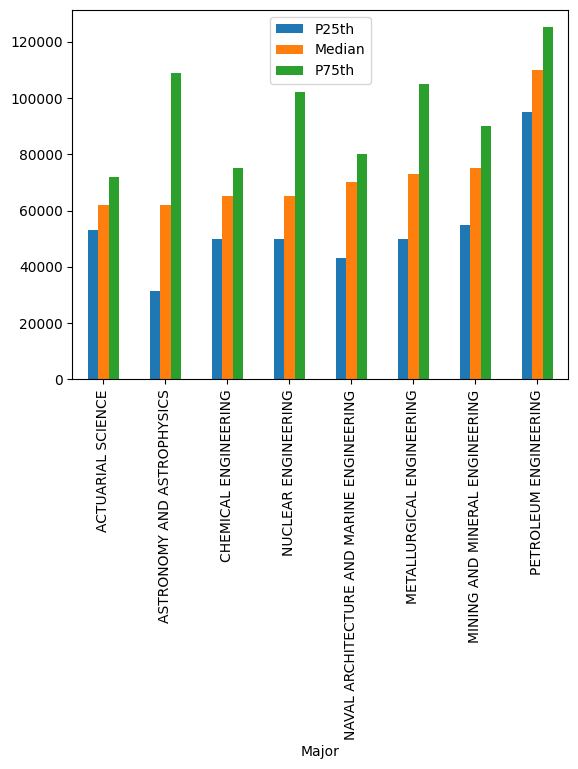

In [21]:
# plot a bar chart containing all three intervals
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

<p>As we can see, petroleum engineering graduates really earned much more than the rest. This is confirmed by the 25th and the 75th percentile values. Compared to other jobs, the difference between them is also not as large as, for example, Astronomy and Astrophysics, in which the 75h percentile is nearly as high as Petroleum Engineering's median salary value.</p>
<p>We want to inspect extreme values for two reasons. First, in this case, to find extreme values that reflect an abnormal value, such as the median salary for a particular industry. Second, the other is to detect <b>invalid data</b>.</p>
<h4>4.3.1. Invalid Data</h3>
<p>Possible reasons for invalid data are:</p>
<ul>
    <li>Sensor failures</li>
    <li>Data Entry Issues</li>
    <li>Inappropriate Data Source</li>
</ul>
<p>Even if the data is valid, sometimes, an extreme value can distort or even mask other trends. It is advisable, hence, to remove extreme values and take a look at the results once more.</p>
<hr>
<h2>5. Check for <b>Correlation</b></h2>
<p>Our goal here is to answer the following question:</p>
<ul>
    <li>If you pick a major with higher median earnings, do you have a lower change of <b>unemployment?</b></li>
</ul>
<p>To get this answer, we can plot a scatter plot using <code>"Median"</code> and <code>"Unemployment_rate</code> and try to understand whether there is any strong correlation between these two variables:</p>

<Axes: xlabel='Median', ylabel='Unemployment_rate'>

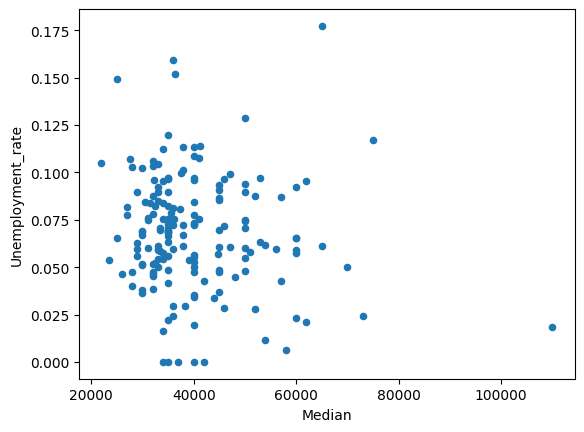

In [22]:
df.plot(kind="scatter", x="Median", y="Unemployment_rate")

<p>At a first glance, we cannot see a strong correlation between these two variables. But always remember, <b>correlation does not imply causation</b>!</p>
<p>As an extra, you can use <code>.corr()</code> to get a correlation matrix between all variables.</p>

In [23]:
df.corr(numeric_only=True)

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,1.000000,0.108429,0.071137,-0.094780,0.174913,0.643781,0.008492,0.070751,0.034725,0.193174,0.020418,0.090078,0.068900,-0.873308,-0.735688,-0.802686,0.052639,0.144689,0.202920
Major_code,0.108429,1.000000,0.196784,0.179299,0.181459,0.259211,0.206580,0.200925,0.199397,0.195184,0.205634,0.223418,0.126603,-0.176072,-0.166864,-0.094556,0.041198,0.232425,0.225294
Total,0.071137,0.196784,1.000000,0.878088,0.944764,0.142999,0.945575,0.996214,0.989339,0.950268,0.981112,0.974768,0.083192,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510
Men,-0.094780,0.179299,0.878088,1.000000,0.672759,-0.112014,0.875176,0.870605,0.893563,0.751592,0.892454,0.869411,0.101502,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336
Women,0.174913,0.181459,0.944764,0.672759,1.000000,0.297832,0.862606,0.944037,0.917681,0.954513,0.905720,0.911694,0.059108,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470
ShareWomen,0.643781,0.259211,0.142999,-0.112014,0.297832,1.000000,0.097496,0.147547,0.120200,0.212290,0.112523,0.121243,0.073205,-0.618690,-0.500199,-0.586932,0.195550,0.137007,0.187850
Sample_size,0.008492,0.206580,0.945575,0.875176,0.862606,0.097496,1.000000,0.964462,0.978396,0.824824,0.985235,0.918059,0.059872,-0.067578,-0.025229,-0.055737,0.701704,0.915464,0.860319
Employed,0.070751,0.200925,0.996214,0.870605,0.944037,0.147547,0.964462,1.000000,0.995838,0.934528,0.991047,0.968900,0.068056,-0.107547,-0.067514,-0.087560,0.797534,0.941326,0.927224
Full_time,0.034725,0.199397,0.989339,0.893563,0.917681,0.120200,0.978396,0.995838,1.000000,0.900877,0.998203,0.960102,0.063349,-0.082258,-0.042957,-0.065073,0.772515,0.933124,0.904852
Part_time,0.193174,0.195184,0.950268,0.751592,0.954513,0.212290,0.824824,0.934528,0.900877,1.000000,0.880855,0.945094,0.108944,-0.190124,-0.153509,-0.158220,0.804987,0.909634,0.951593


<hr>
<h2>6. Analyze <b>Categorical Data</b></h2>
<p>In this section, we'll dwelve into categorization, that is, the process of putting things that look alike in a same area to check if this given process makes sense.</p>
<p>In Pandas, we can group by  using <code>.groupby()</code> and get the sum of <code>"Total"</code>.</p>



In [24]:
# Group values by "Major_category", then get the sum of values using "Total", sorting the values in ascending order
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()

In [25]:
cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

<Axes: ylabel='Major_category'>

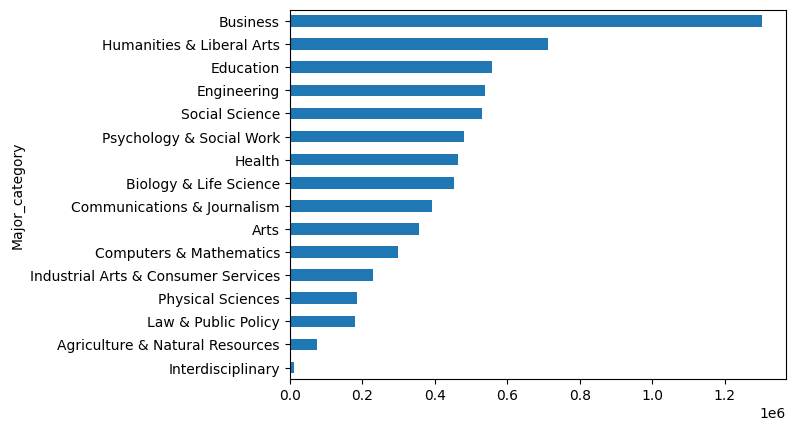

In [26]:
cat_totals.plot(kind="barh", fontsize=10)

<p>As we can see, Business stands out as the preferred major category, with Humanities & Liberal Arts following in a distant second place.</p>
<hr>
<h2>7. Determining <b>Ratios<b></h2>
<p>



<Axes: >

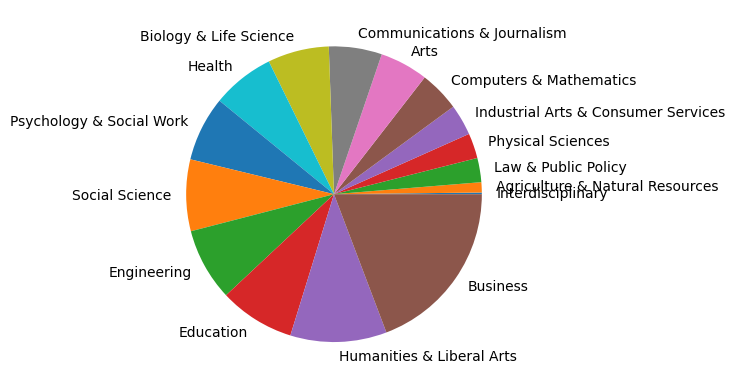

In [27]:
cat_totals.plot(kind="pie", label="")

In [39]:
small_cat_totals = cat_totals[cat_totals < 100000]

In [40]:
big_cat_totals = cat_totals[cat_totals > 100000]

In [41]:
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])

In [42]:
big_cat_totals = big_cat_totals.append(small_sums)

C:\Users\Felipe\AppData\Local\Temp\ipykernel_12576\4256570708.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big_cat_totals = big_cat_totals.append(small_sums)


<Axes: >

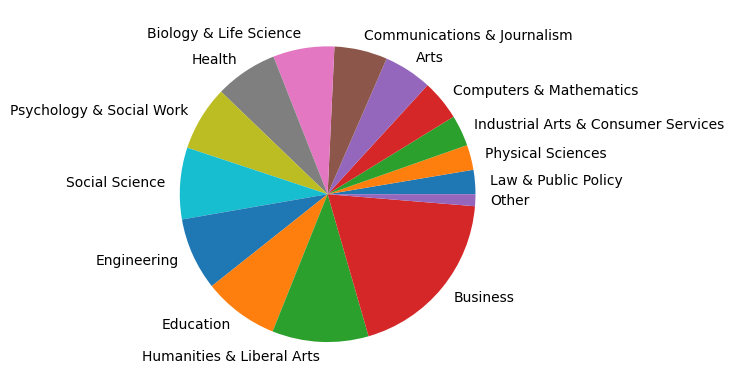

In [43]:
big_cat_totals.plot(kind="pie", label="")

<h3>6.1. <b>Zooming In</b> on Categories</h3>
<p>

<Axes: ylabel='Frequency'>

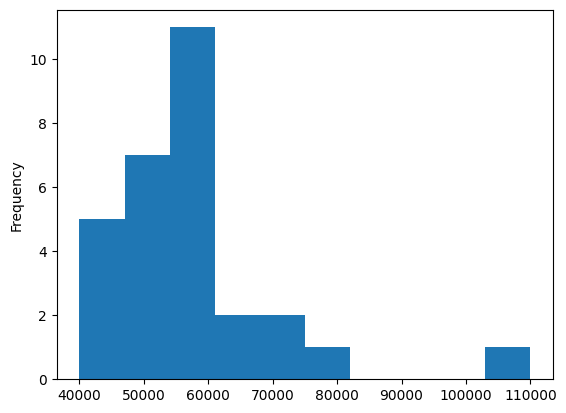

In [44]:
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")